In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from scipy import stats

In [154]:
data = pd.read_csv("Electric_Vehicle_Population_Data.csv")
data.head()

,VIN (1-10),County,City,State,ZIP Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location
0,KNDCE3LG3L,King,RENTON,WA,98059,2020,KIA,NIRO,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,239,0,11.0,128569878,POINT (-122.132064 47.494834)
1,KNDCE3LG9K,King,SEATTLE,WA,98108,2019,KIA,NIRO ELECTRIC,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,239,38500,37.0,105987073,POINT (-122.31336800000001 47.54411)
2,KNDCC3LG5L,King,RENTON,WA,98057,2020,KIA,NIRO,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,239,0,37.0,114300301,POINT (-122.215501 47.476576)
3,1G1FY6S00K,Thurston,YELM,WA,98597,2019,CHEVROLET,BOLT,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,36620,2.0,113112303,POINT (-122.558621 46.888349)
4,1N4AZ0CP6F,Chelan,LEAVENWORTH,WA,98826,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,29010,12.0,330944169,POINT (-120.73040299999998 47.74993200000001)


In [155]:
data.shape #Gives the dimensions of dataset

(62261, 15)

In [156]:
data.info() #Gives info of the type of data in each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62261 entries, 0 to 62260
Data columns (total 15 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   VIN (1-10)                                         62261 non-null  object 
 1   County                                             62260 non-null  object 
 2   City                                               62261 non-null  object 
 3   State                                              62261 non-null  object 
 4   ZIP Code                                           62261 non-null  int64  
 5   Model Year                                         62261 non-null  int64  
 6   Make                                               62261 non-null  object 
 7   Model                                              62261 non-null  object 
 8   Electric Vehicle Type                              62261 non-null  object 
 9   Clean 

In [157]:
#number of null values in each column
data.isnull().sum()


VIN (1-10)                                            0
County                                                1
City                                                  0
State                                                 0
ZIP Code                                              0
Model Year                                            0
Make                                                  0
Model                                                 0
Electric Vehicle Type                                 0
Clean Alternative Fuel Vehicle (CAFV) Eligibility     0
Electric Range                                        0
Base MSRP                                             0
Legislative District                                 39
DOL Vehicle ID                                        0
Vehicle Location                                      2
dtype: int64

In [158]:
#dropping the column state
data.drop("State", inplace=True, axis=1)
data.shape

(62261, 14)

In [159]:
data.head()

,VIN (1-10),County,City,ZIP Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location
0,KNDCE3LG3L,King,RENTON,98059,2020,KIA,NIRO,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,239,0,11.0,128569878,POINT (-122.132064 47.494834)
1,KNDCE3LG9K,King,SEATTLE,98108,2019,KIA,NIRO ELECTRIC,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,239,38500,37.0,105987073,POINT (-122.31336800000001 47.54411)
2,KNDCC3LG5L,King,RENTON,98057,2020,KIA,NIRO,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,239,0,37.0,114300301,POINT (-122.215501 47.476576)
3,1G1FY6S00K,Thurston,YELM,98597,2019,CHEVROLET,BOLT,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,36620,2.0,113112303,POINT (-122.558621 46.888349)
4,1N4AZ0CP6F,Chelan,LEAVENWORTH,98826,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,29010,12.0,330944169,POINT (-120.73040299999998 47.74993200000001)


In [160]:
data.dropna(subset=['County',"Legislative District","Vehicle Location"],axis=0,inplace=True) 


In [161]:
data.isnull().sum()


VIN (1-10)                                           0
County                                               0
City                                                 0
ZIP Code                                             0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
dtype: int64

In [162]:
data['Base MSRP'].replace(0,data['Base MSRP'].mean(),inplace=True)


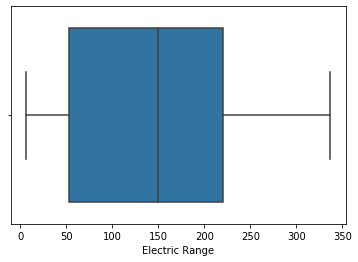

In [163]:
sns.boxplot(data['Electric Range'])

(51781, 14)


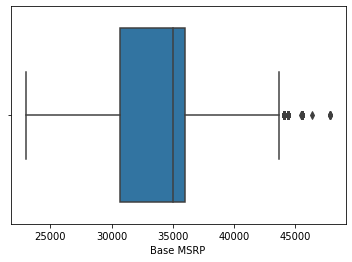

In [168]:
#DETECTION AND REMOVAL OF OUTLIERS FOR Base MSRP

Q1 = data["Base MSRP"].quantile(0.25)
Q3 = data["Base MSRP"].quantile(0.75)
IQR = Q3 - Q1
upper_limit=Q3+1.5*IQR
lower_limit=Q1-1.5*IQR

#REMOVE OUTLIERS
data_filtered=data[(data['Base MSRP']>lower_limit) & (data['Base MSRP']<upper_limit)]
data_filtered.shape
print(data_filtered.shape)

sns.boxplot(data_filtered['Base MSRP'])

In [170]:
for value,count in data['Base MSRP'].value_counts().iteritems():
    if(count<100):
        data.drop(data.loc[data['Base MSRP']==value].index,inplace=True)

(50426, 14)


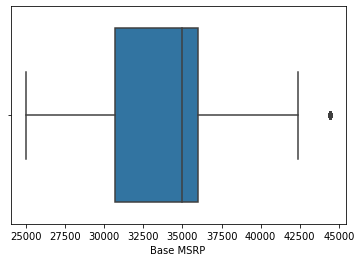

In [171]:
#DETECTION AND REMOVAL OF OUTLIERS FOR ELECTRIC RANGE

Q1 = data["Base MSRP"].quantile(0.25)
Q3 = data["Base MSRP"].quantile(0.75)
IQR = Q3 - Q1
upper_limit=Q3+1.5*IQR
lower_limit=Q1-1.5*IQR

#REMOVE OUTLIERS
data_filtered=data[(data['Base MSRP']>lower_limit) & (data['Base MSRP']<upper_limit)]
data_filtered.shape
print(data_filtered.shape)

sns.boxplot(data_filtered['Base MSRP'])

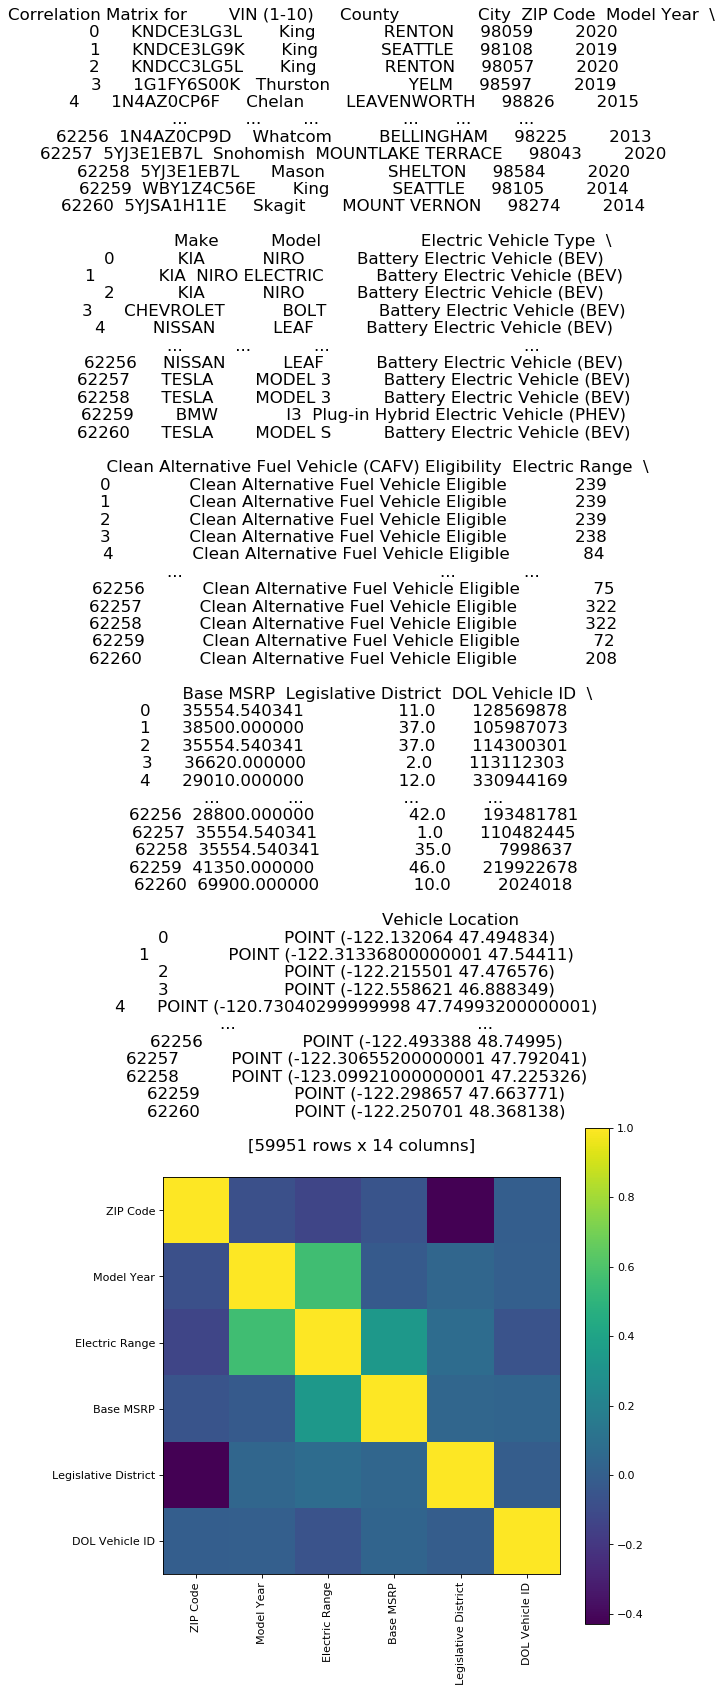

In [172]:
def plotCorrelationMatrix(df, graphWidth):
    filename = df
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
#         print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()
plotCorrelationMatrix(data, 8)

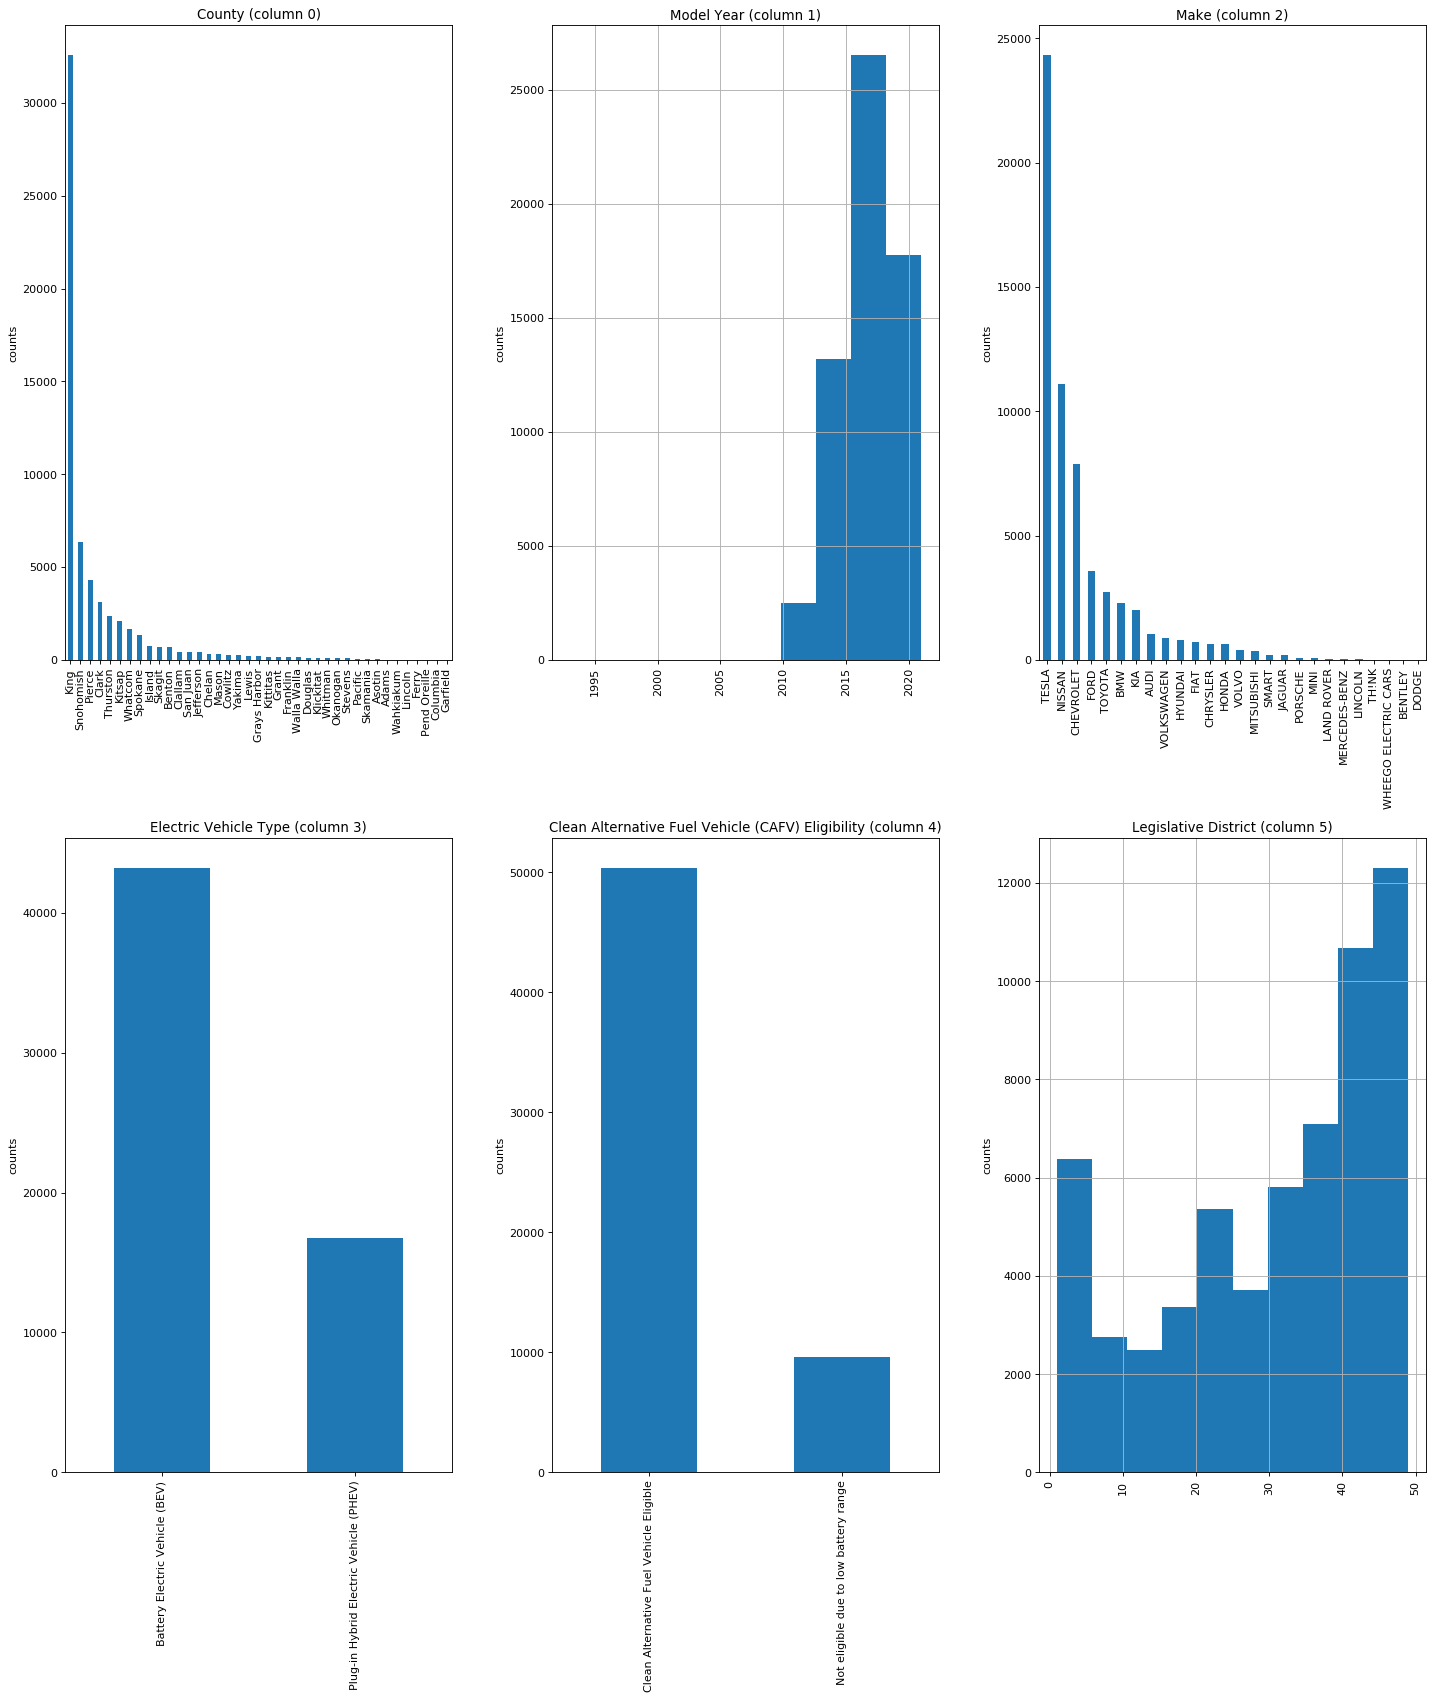

In [173]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()
plotPerColumnDistribution(data, 10, 3)

In [175]:
data['Base MSRP'].value_counts()

35554.540341    8539
36000.000000    6098
35000.000000    3924
29010.000000    3148
29990.000000    2830
                ... 
63750.000000     113
39200.000000     107
33520.000000     104
67800.000000     103
68100.000000     103
Name: Base MSRP, Length: 74, dtype: int64